In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-stock-prices-2015-2024/GoogleStockPrices.csv


In [2]:
df=pd.read_csv('/kaggle/input/google-stock-prices-2015-2024/GoogleStockPrices.csv')
df

,Date,Open,High,Low,Close,Volume
0,2015-01-02 16:00:00,26.63,26.79,26.39,26.48,1327870
1,2015-01-05 16:00:00,26.36,26.40,25.89,25.97,2059119
2,2015-01-06 16:00:00,26.02,26.06,25.28,25.33,2731813
3,2015-01-07 16:00:00,25.55,25.57,25.18,25.26,2345875
4,2015-01-08 16:00:00,25.08,25.38,24.75,25.35,3662224
...,...,...,...,...,...,...
2511,2024-12-24 13:05:00,194.84,196.11,193.78,196.11,10403259
2512,2024-12-26 16:00:00,195.15,196.75,194.38,195.60,12057210
2513,2024-12-27 16:00:00,194.95,195.32,190.65,192.76,18891362
2514,2024-12-30 16:00:00,189.80,192.55,189.12,191.24,14264659


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2516 non-null   object 
 1   Open    2516 non-null   float64
 2   High    2516 non-null   float64
 3   Low     2516 non-null   float64
 4   Close   2516 non-null   float64
 5   Volume  2516 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


In [26]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [5]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

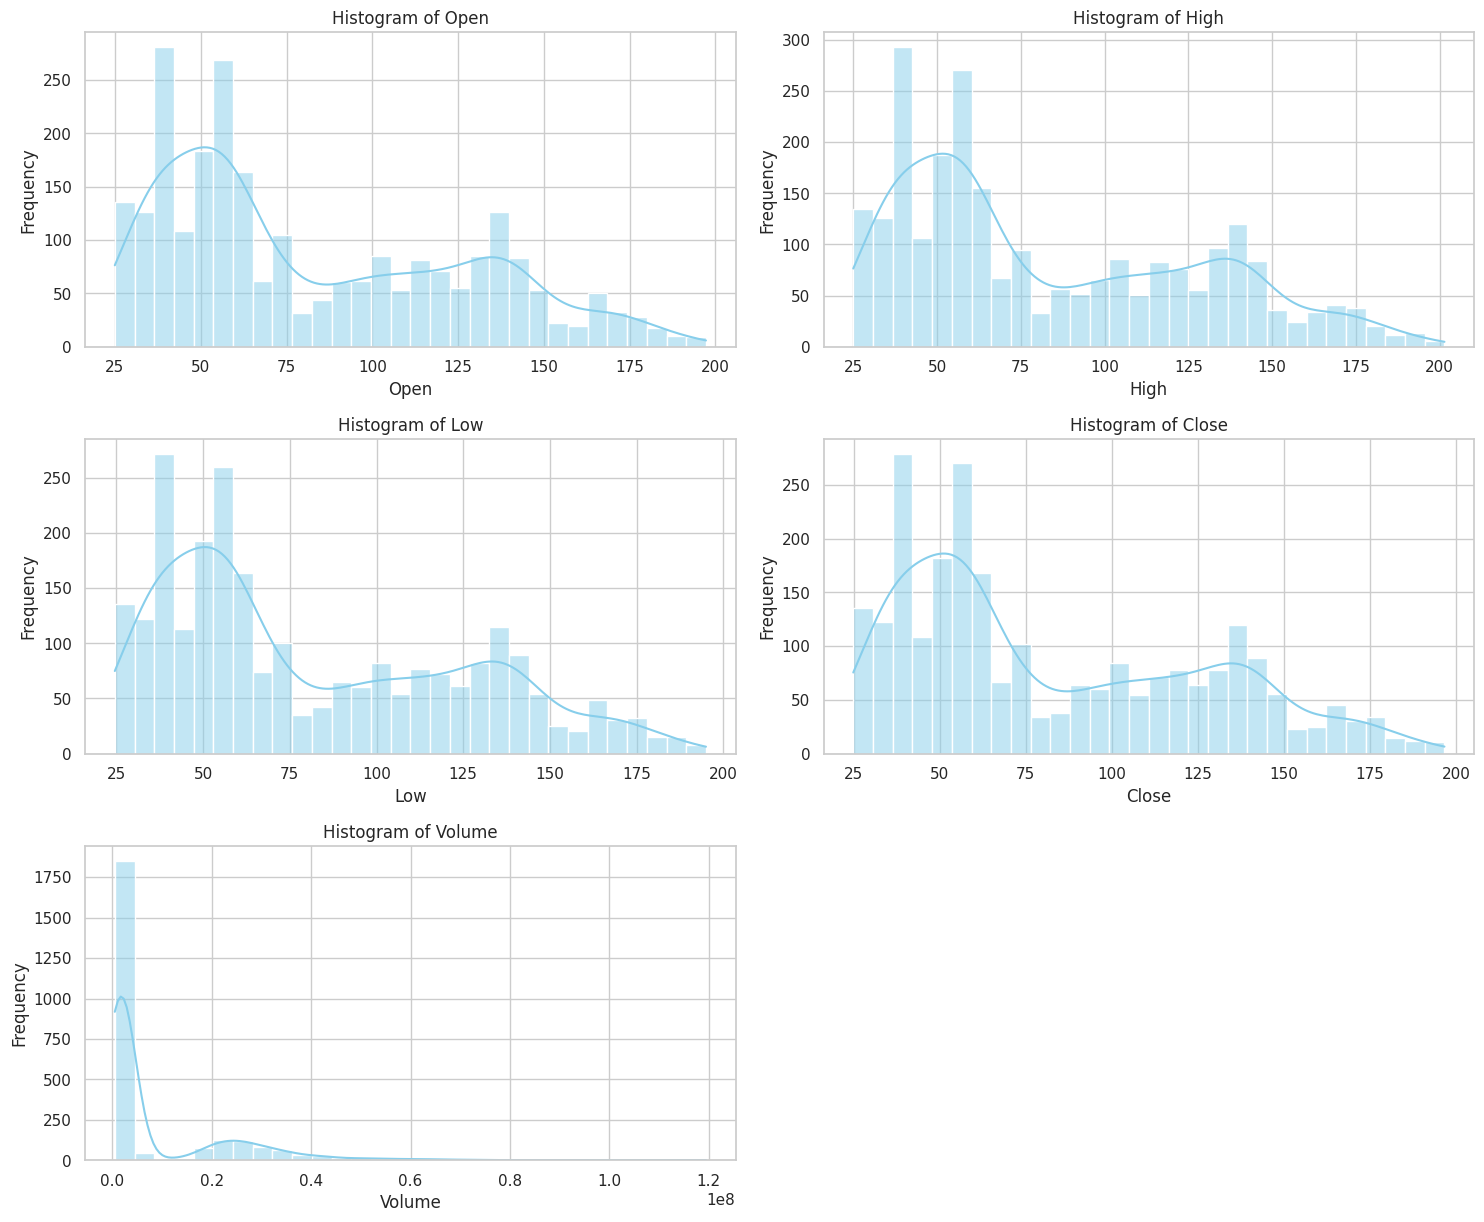

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/kaggle/input/google-stock-prices-2015-2024/GoogleStockPrices.csv')

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number').columns

# Set plot style
sns.set(style='whitegrid')

# Plot histograms for all numeric columns
plt.figure(figsize=(15, len(numeric_cols) * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

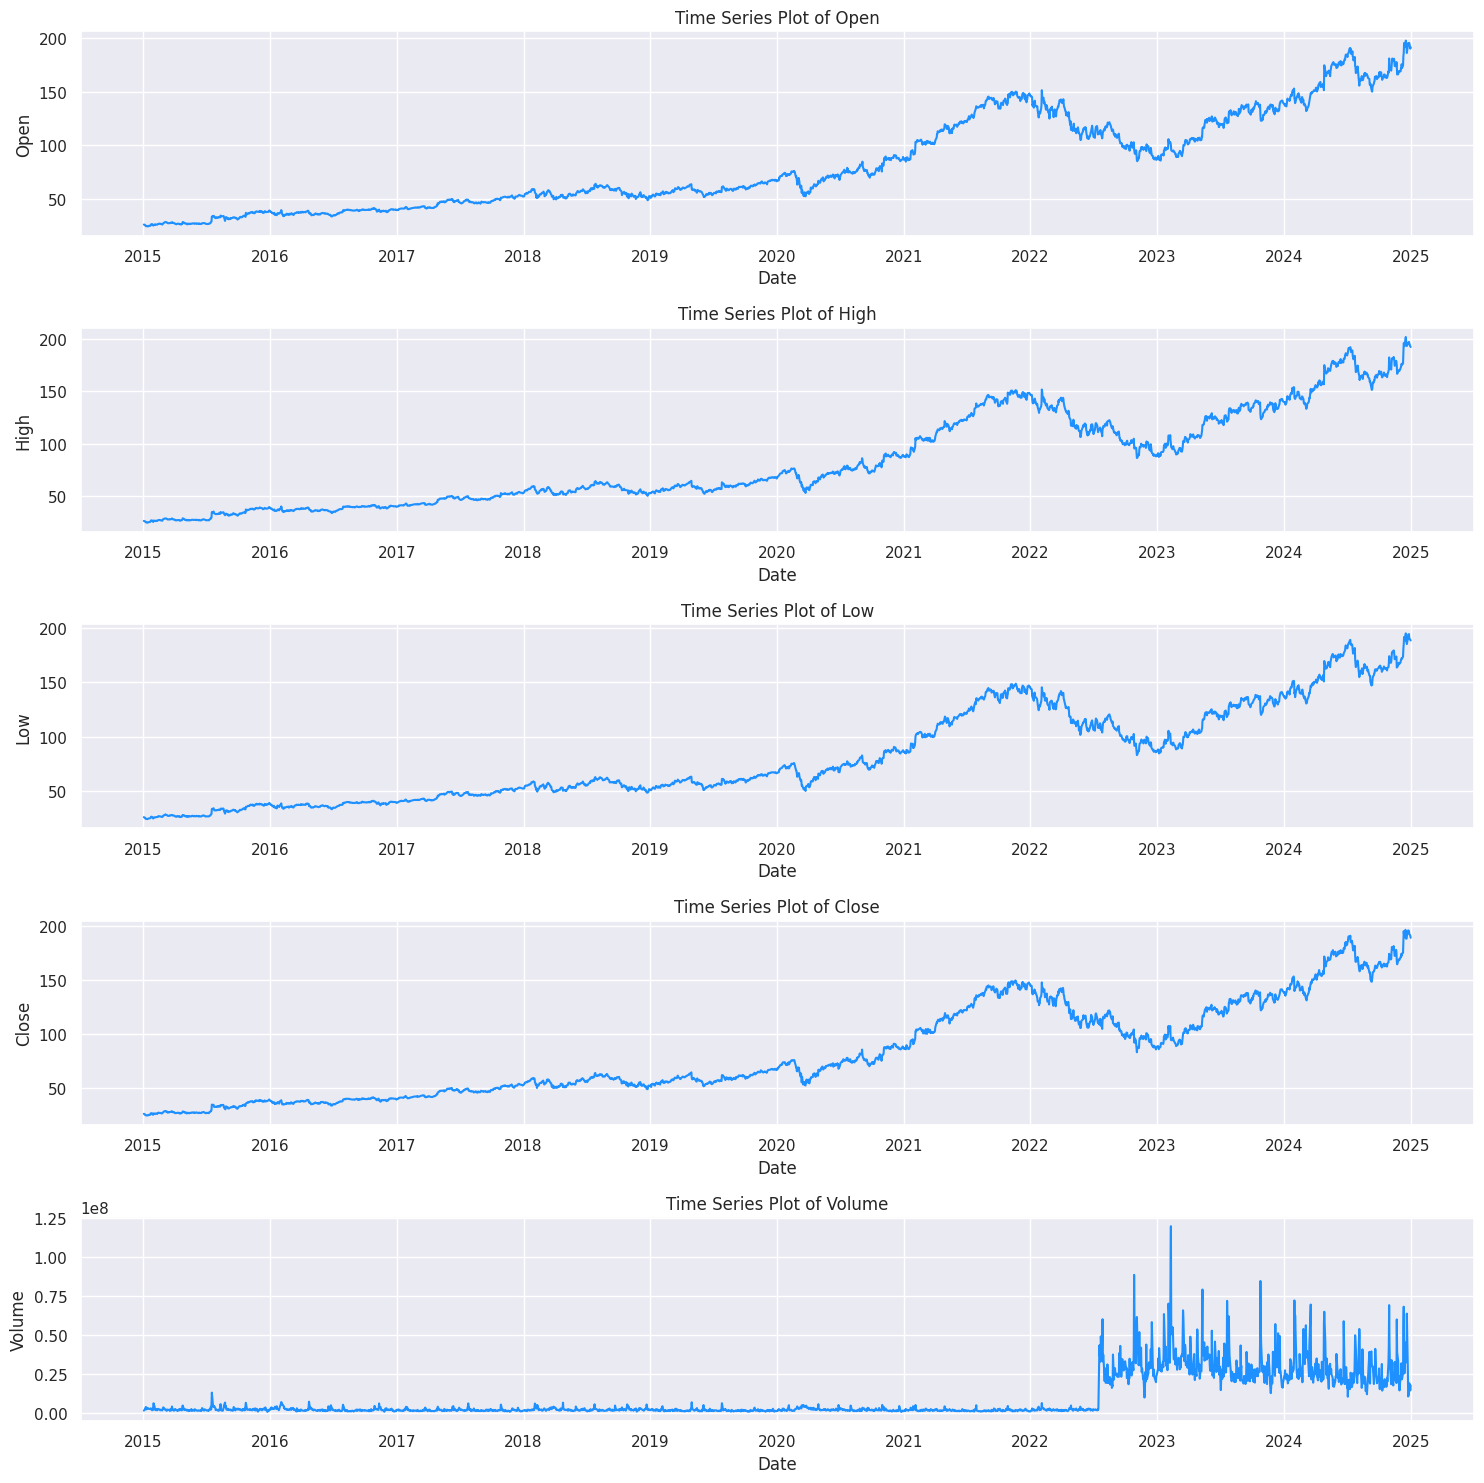

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/google-stock-prices-2015-2024/GoogleStockPrices.csv')

# Try to parse the date column (adjust if needed)
if 'DATE' in df.columns:
    df['DATE'] = pd.to_datetime(df['DATE'])
    df.set_index('DATE', inplace=True)
else:
    # Try auto-detecting the date column
    date_col = df.columns[df.columns.str.contains('date', case=False)].tolist()
    if date_col:
        df[date_col[0]] = pd.to_datetime(df[date_col[0]])
        df.set_index(date_col[0], inplace=True)

# Get numeric columns (excluding index)
numeric_cols = df.select_dtypes(include='number').columns

# Set style
sns.set(style='darkgrid')

# Plot all numeric columns as line plots
plt.figure(figsize=(15, len(numeric_cols) * 3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.lineplot(data=df, x=df.index, y=col, color='dodgerblue')
    plt.title(f'Time Series Plot of {col}')
    plt.xlabel('Date')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


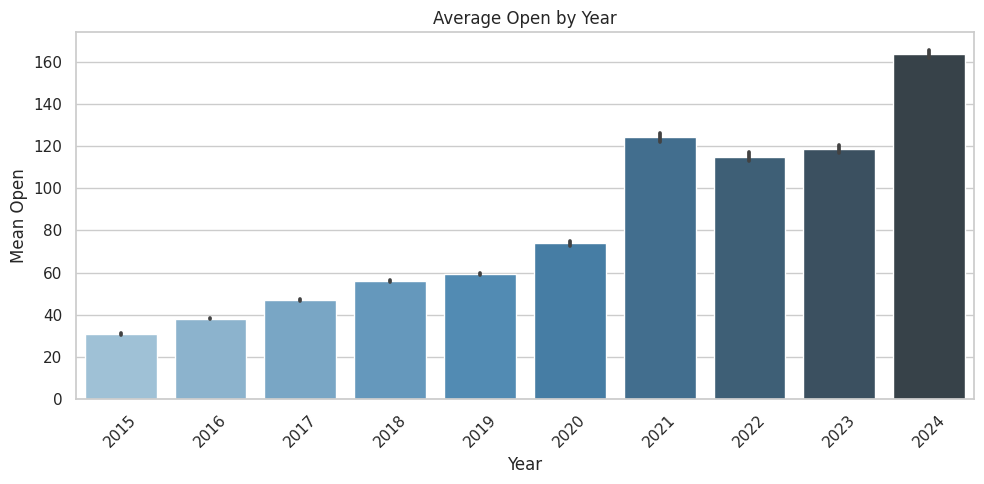

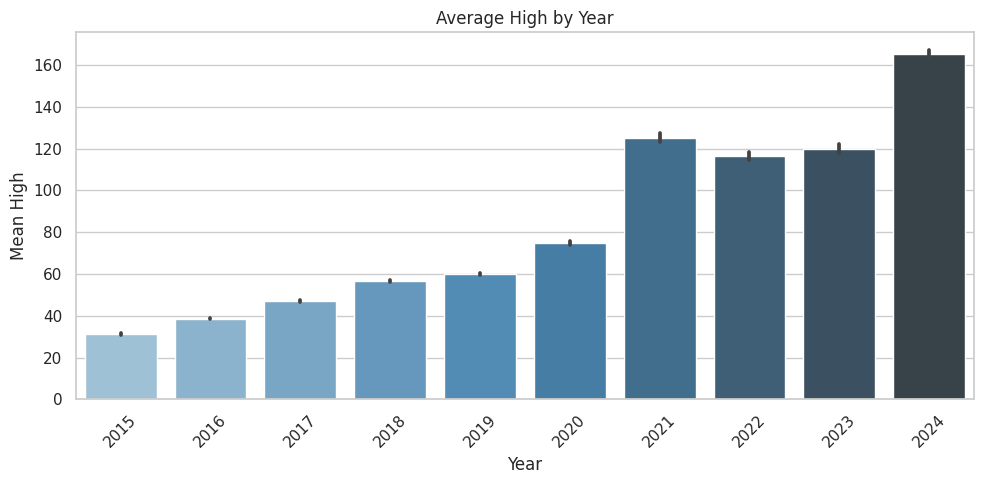

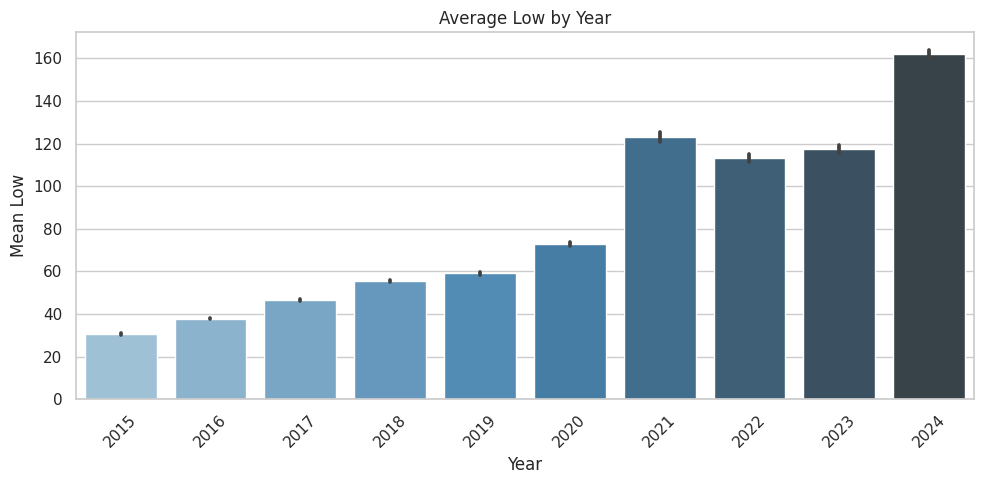

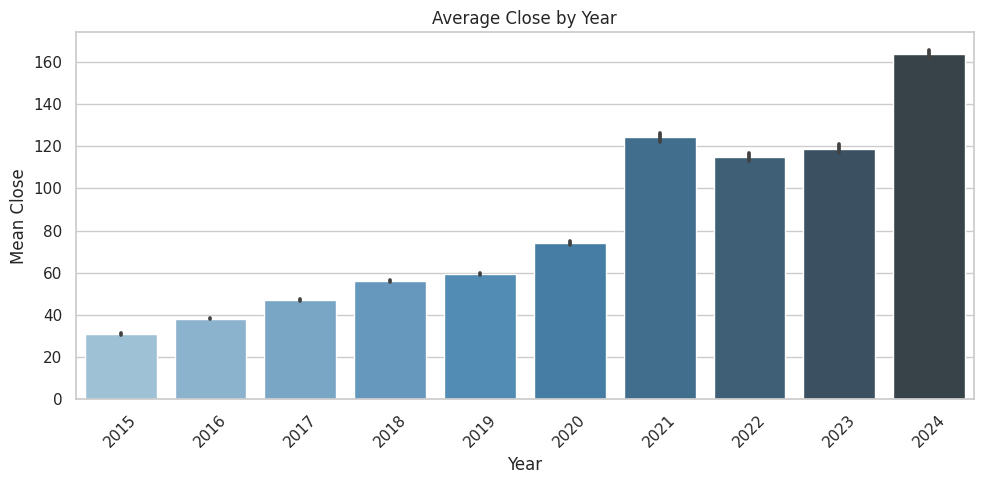

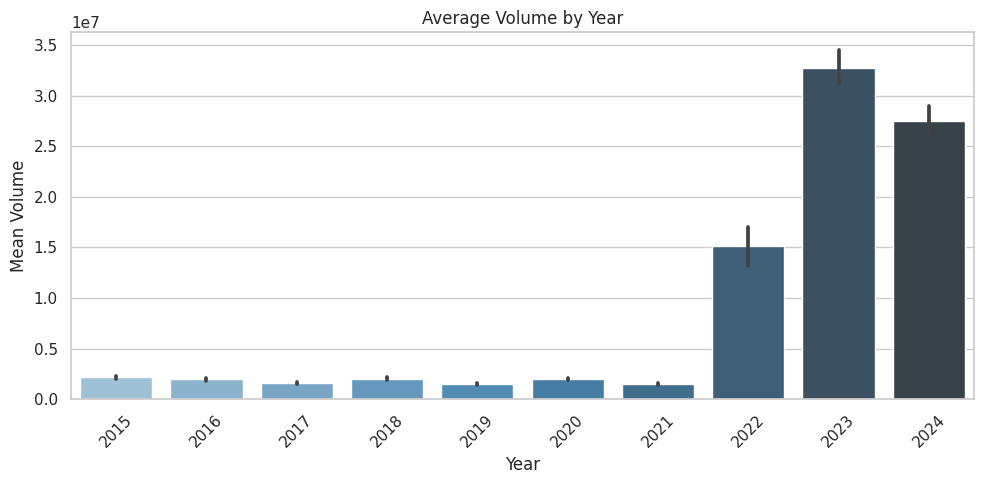

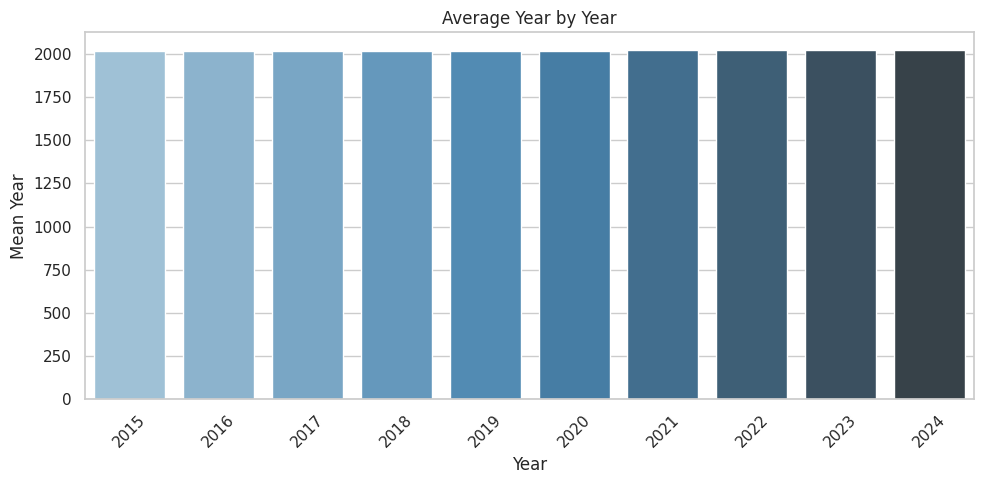

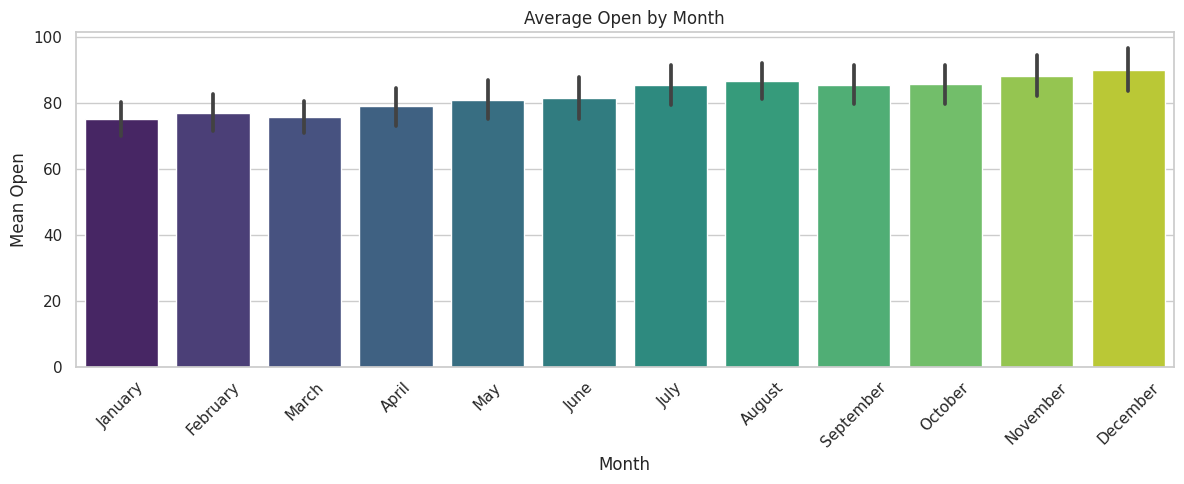

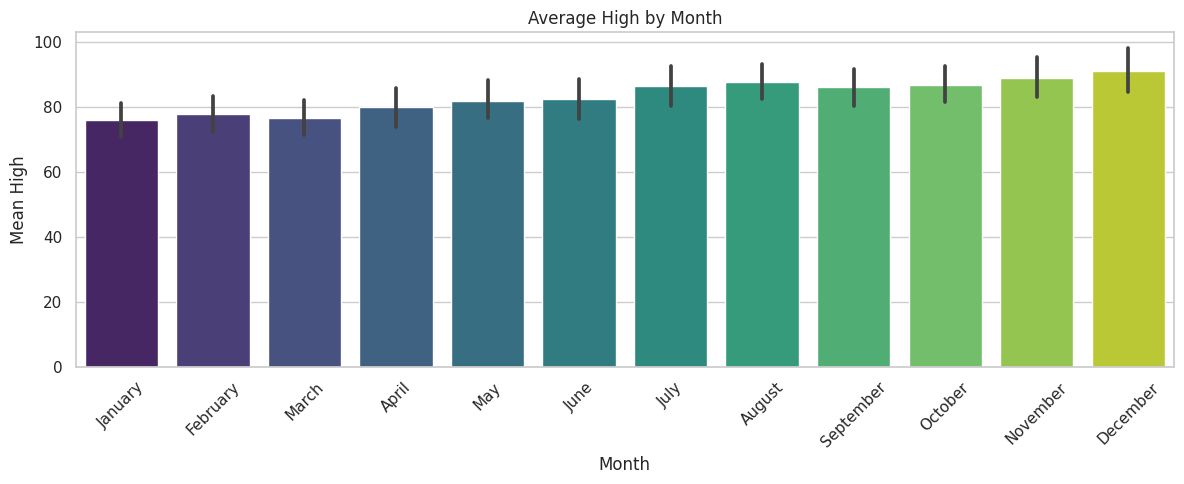

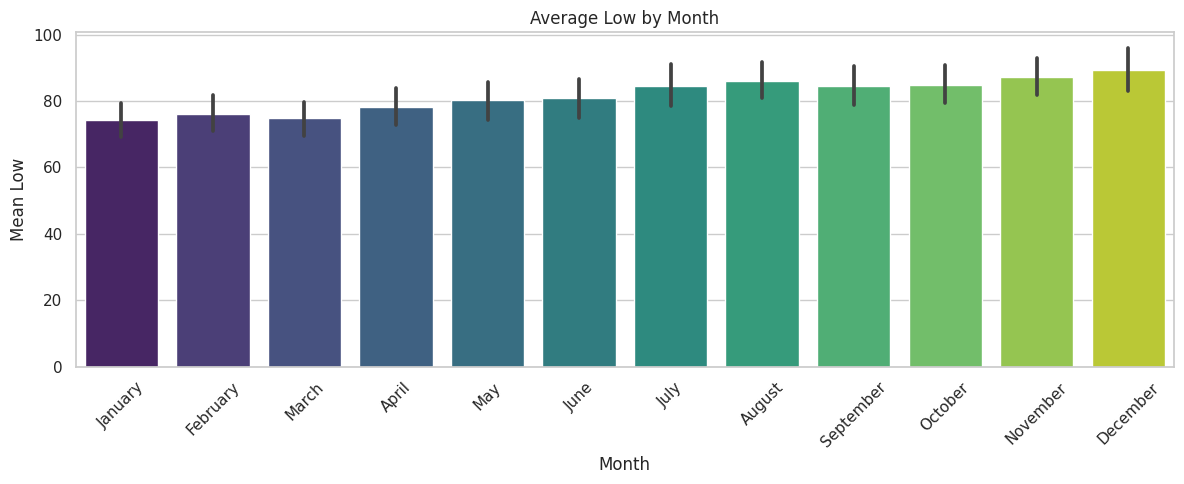

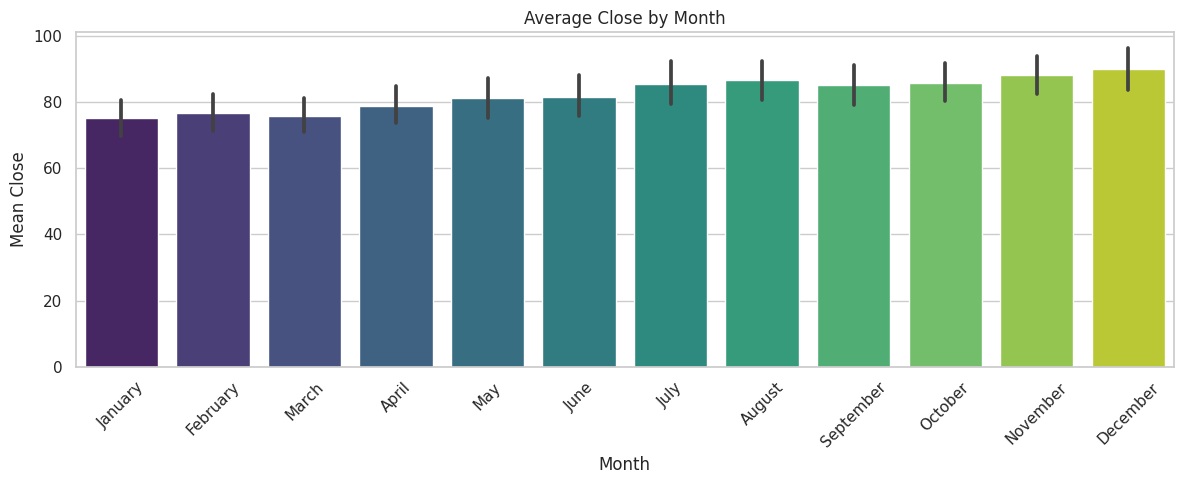

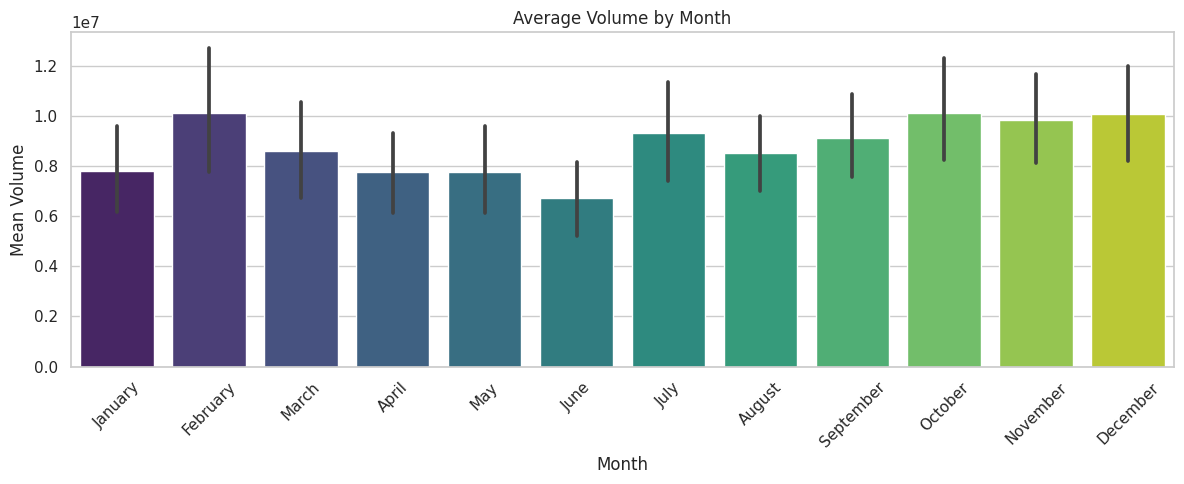

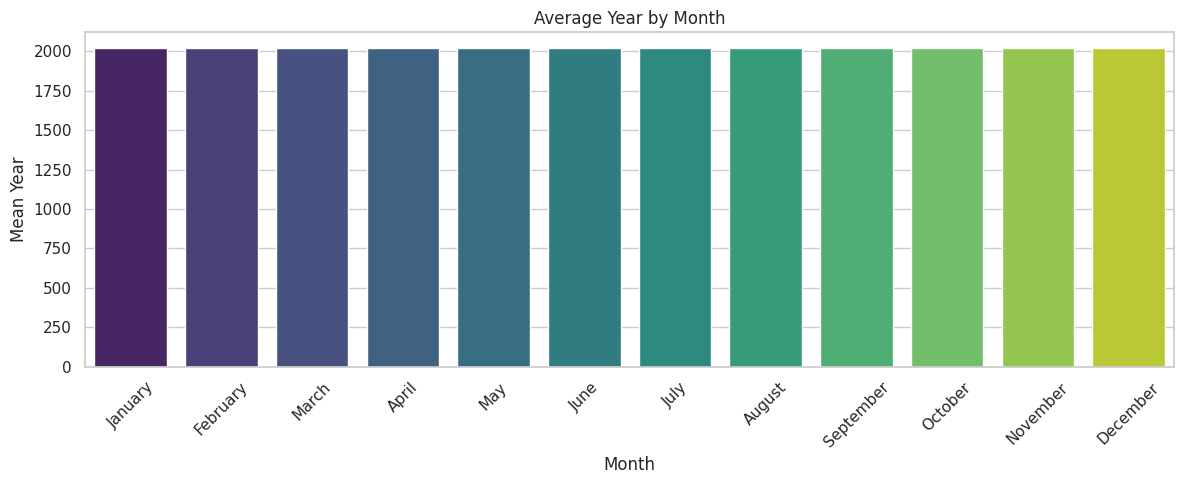

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/kaggle/input/google-stock-prices-2015-2024/GoogleStockPrices.csv')

# Try to parse the date column
date_col = df.columns[df.columns.str.contains('date', case=False)].tolist()
if date_col:
    df[date_col[0]] = pd.to_datetime(df[date_col[0]])
    df['Year'] = df[date_col[0]].dt.year
    df['Month'] = df[date_col[0]].dt.month_name()
else:
    raise ValueError("Date column not found. Make sure there's a valid date column.")

# Get numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Set style
sns.set(style="whitegrid")

# Bar plot: Average of each numeric column by Year
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x='Year', y=col, palette='Blues_d', estimator='mean')
    plt.title(f'Average {col} by Year')
    plt.ylabel(f'Mean {col}')
    plt.xlabel('Year')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Bar plot: Average of each numeric column by Month (aggregated over all years)
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    order = ['January','February','March','April','May','June','July',
             'August','September','October','November','December']
    sns.barplot(data=df, x='Month', y=col, order=order, palette='viridis', estimator='mean')
    plt.title(f'Average {col} by Month')
    plt.ylabel(f'Mean {col}')
    plt.xlabel('Month')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


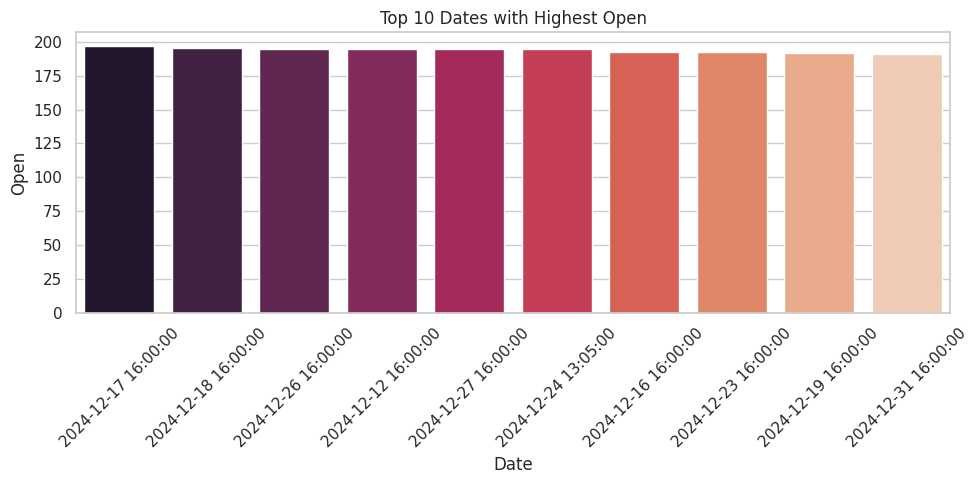

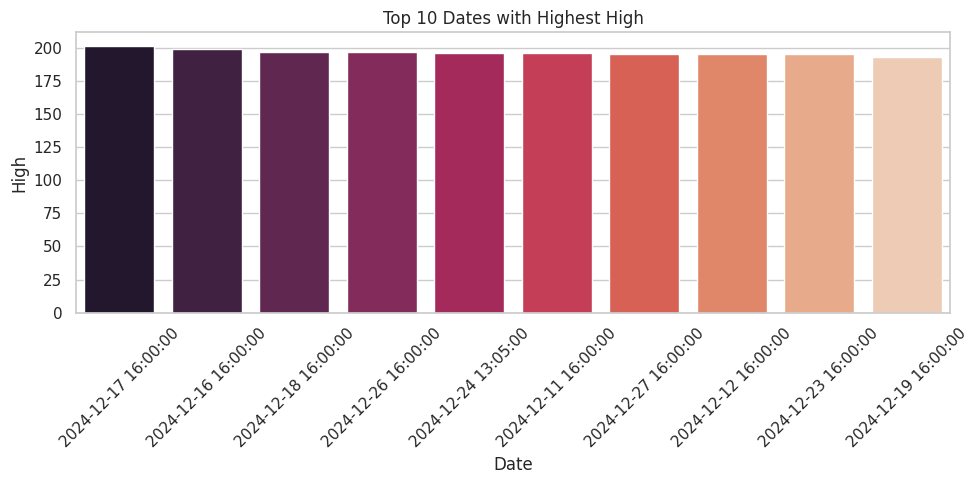

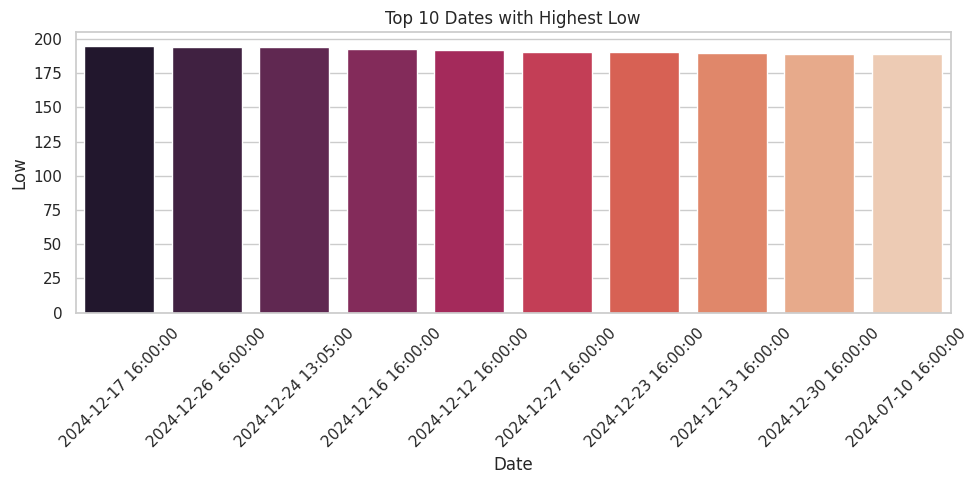

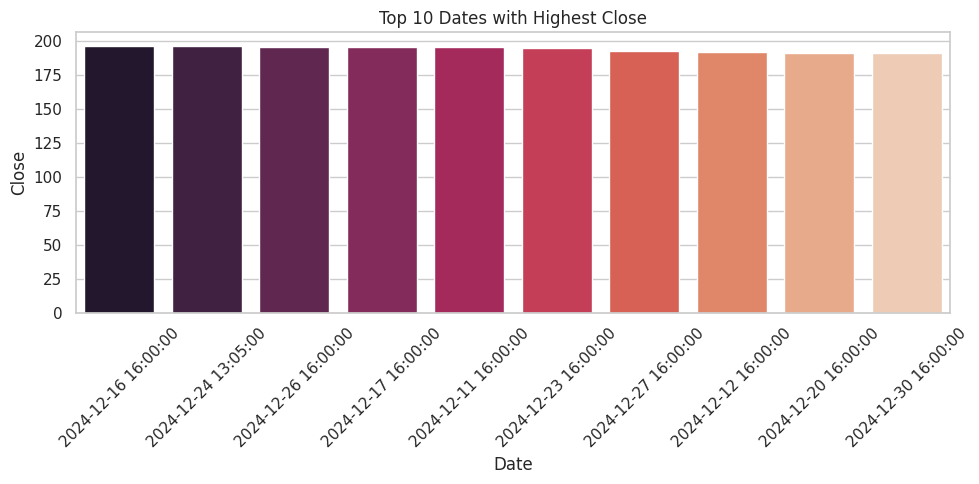

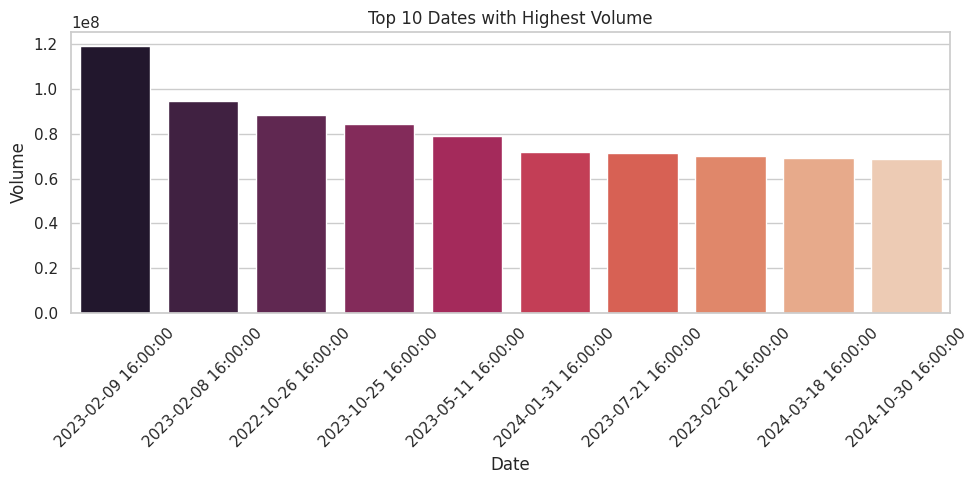

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/kaggle/input/google-stock-prices-2015-2024/GoogleStockPrices.csv')

# Try to parse the date column
date_col = df.columns[df.columns.str.contains('date', case=False)].tolist()
if date_col:
    df[date_col[0]] = pd.to_datetime(df[date_col[0]])
else:
    raise ValueError("Date column not found.")

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Set plot style
sns.set(style="whitegrid")

# Example: Top 10 highest days by each numeric column
for col in numeric_cols:
    top_df = df.nlargest(10, col)
    plt.figure(figsize=(10, 5))
    sns.barplot(data=top_df, x=date_col[0], y=col, palette='rocket')
    plt.title(f'Top 10 Dates with Highest {col}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9858.470, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9863.420, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9865.094, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9865.065, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9864.989, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9858.999, Time=1.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9859.088, Time=1.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9862.622, Time=0.43 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9862.940, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9857.483, Time=3.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9861.956, Time=2.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=9861.704, Time=2.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=9860.227, Time=0.81 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9860.402, Time=1.75 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept

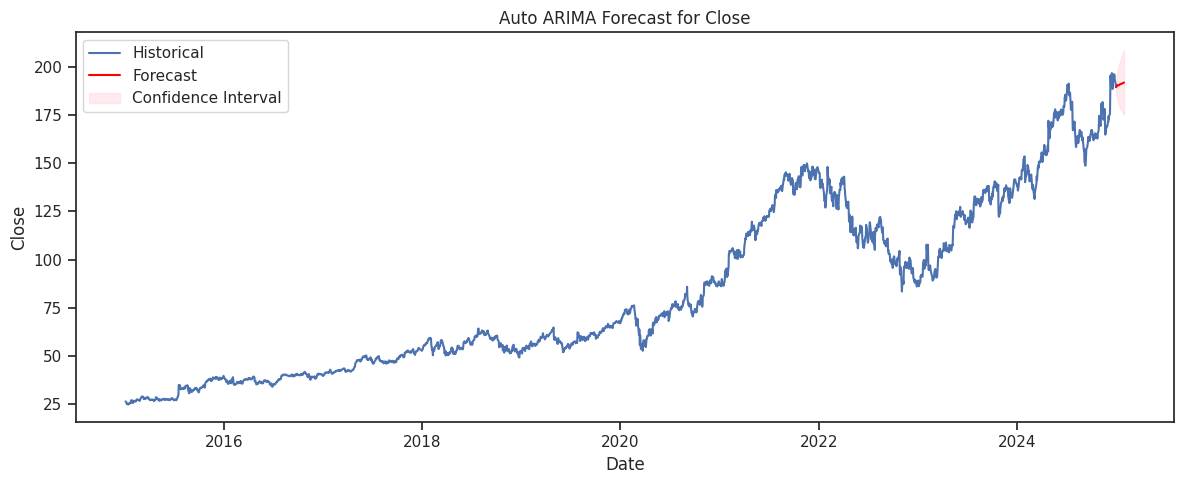

In [17]:
!pip install pmdarima
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/kaggle/input/google-stock-prices-2015-2024/GoogleStockPrices.csv')

# Detect and parse the date column
date_col = df.columns[df.columns.str.contains('date', case=False)].tolist()
if date_col:
    df[date_col[0]] = pd.to_datetime(df[date_col[0]])
    df.set_index(date_col[0], inplace=True)
else:
    raise ValueError("No valid date column found.")

# Select target column
target_col = 'Close' if 'Close' in df.columns else df.select_dtypes(include='number').columns[0]
series = df[target_col].dropna()

# Fit auto ARIMA model
stepwise_model = auto_arima(series,
                             start_p=1, start_q=1,
                             max_p=5, max_q=5,
                             seasonal=False,
                             trace=True,
                             error_action='ignore',  
                             suppress_warnings=True,
                             stepwise=True)

print("Best ARIMA order:", stepwise_model.order)

# Forecast
n_periods = 30
forecast, conf_int = stepwise_model.predict(n_periods=n_periods, return_conf_int=True)

# Create forecast index
last_date = series.index[-1]
forecast_index = pd.date_range(start=last_date, periods=n_periods+1, freq='D')[1:]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(series, label='Historical')
plt.plot(forecast_index, forecast, color='red', label='Forecast')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title(f'Auto ARIMA Forecast for {target_col}')
plt.xlabel('Date')
plt.ylabel(target_col)
plt.legend()
plt.tight_layout()
plt.show()


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('/kaggle/input/google-stock-prices-2015-2024/GoogleStockPrices.csv')

# Detect and parse date column
date_col = df.columns[df.columns.str.contains('date', case=False)].tolist()
if date_col:
    df[date_col[0]] = pd.to_datetime(df[date_col[0]])
    df.set_index(date_col[0], inplace=True)

# Drop rows with missing values
df = df.dropna()

# Choose features and target
target = 'Close'  # Change if needed
X = df.drop(columns=[target])
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree R²:", r2_score(y_test, y_pred_dt))

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("Gradient Boosting R²:", r2_score(y_test, y_pred_gbr))

from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

print("SVR R²:", r2_score(y_test, y_pred_svr))

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN R²:", r2_score(y_test, y_pred_knn))

# pip install xgboost
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost R²:", r2_score(y_test, y_pred_xgb))


Linear Regression R²: 0.9998124554688864
MSE: 0.34452777503353404
Decision Tree R²: 0.9992671493418214
Random Forest R²: 0.9996197676217478
Gradient Boosting R²: 0.9995201869787774
SVR R²: 0.9844196481021014
KNN R²: 0.9984058711790594
XGBoost R²: 0.9995885887758963


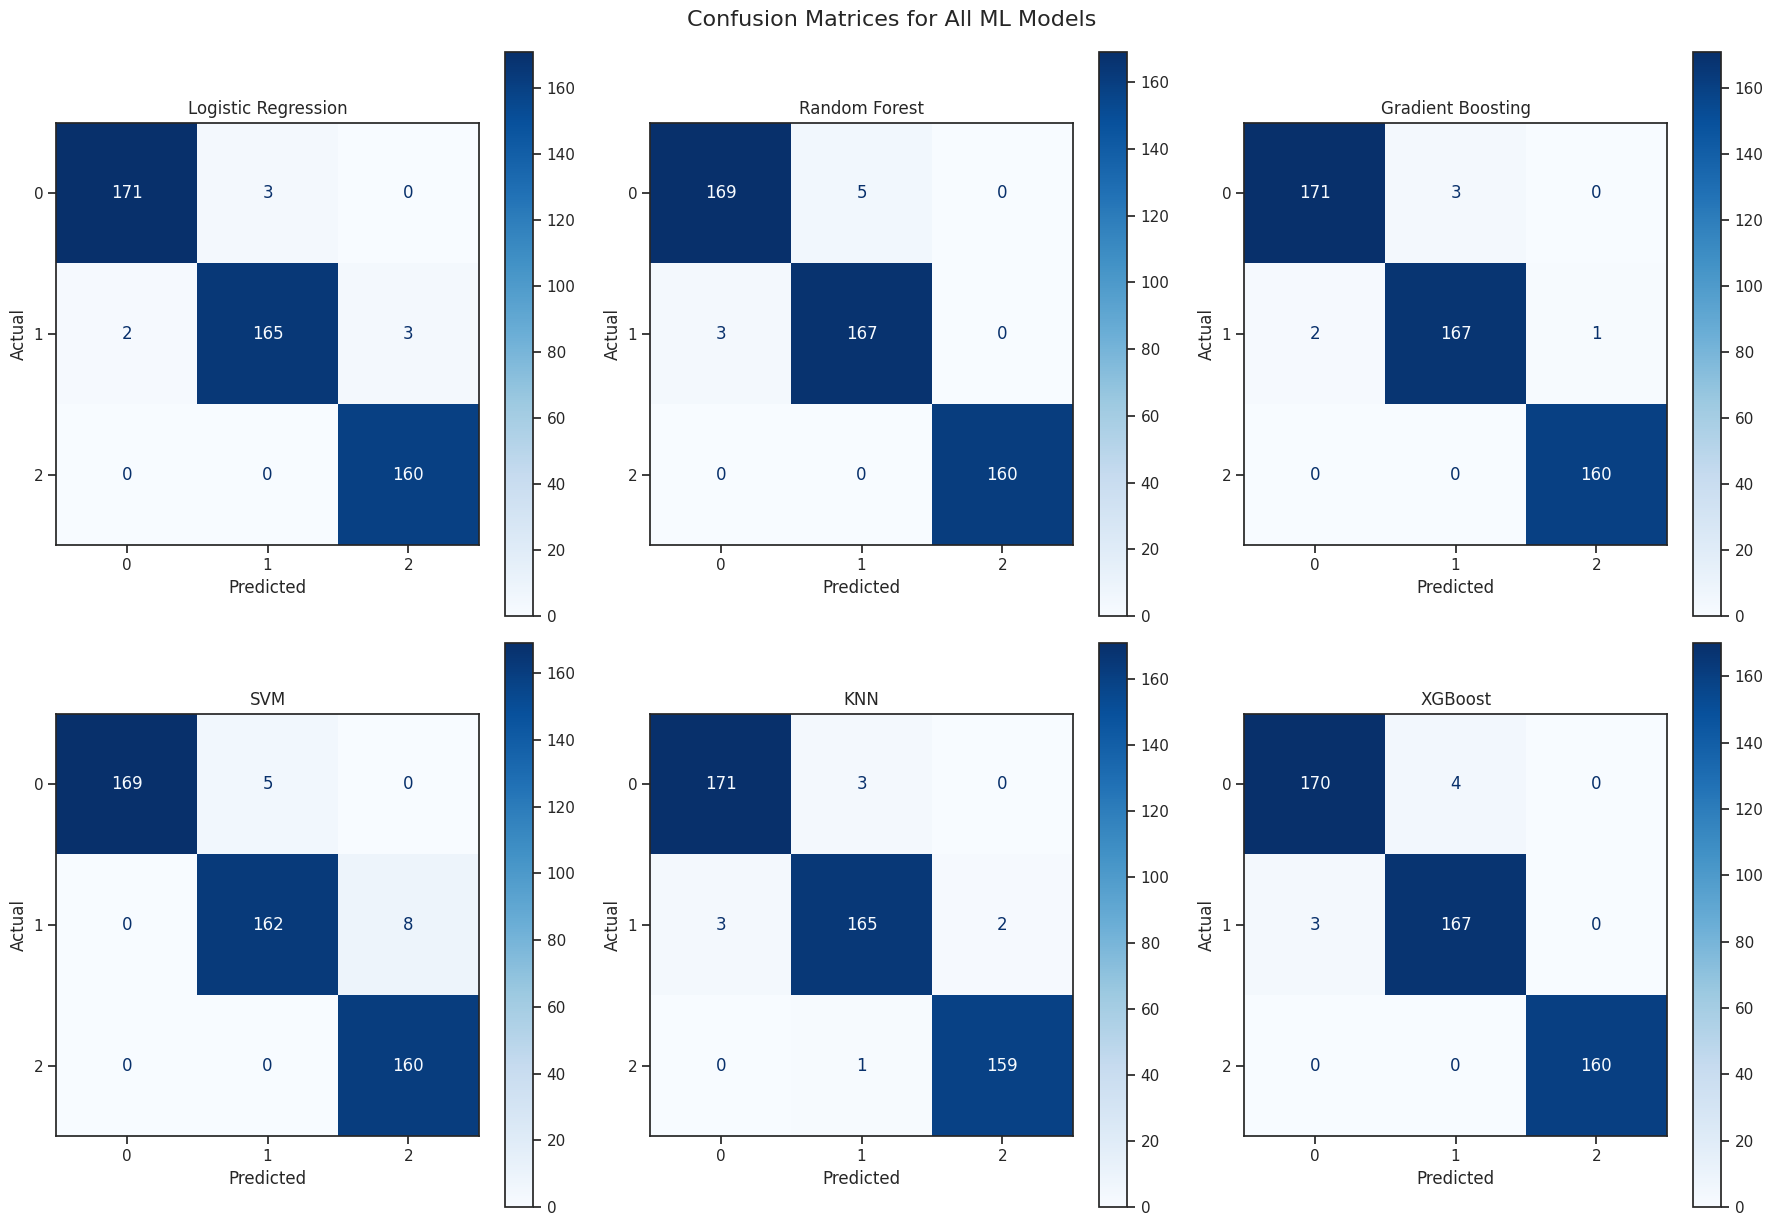

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot Confusion Matrices for All Models
plt.figure(figsize=(18, 12))
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 3, i+1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
    disp.plot(ax=plt.gca(), cmap='Blues', values_format='d')
    plt.title(f"{name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.suptitle("Confusion Matrices for All ML Models", y=1.02, fontsize=16)
plt.show()

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
R²: 0.9996225158201001
MSE: 0.693455489419231


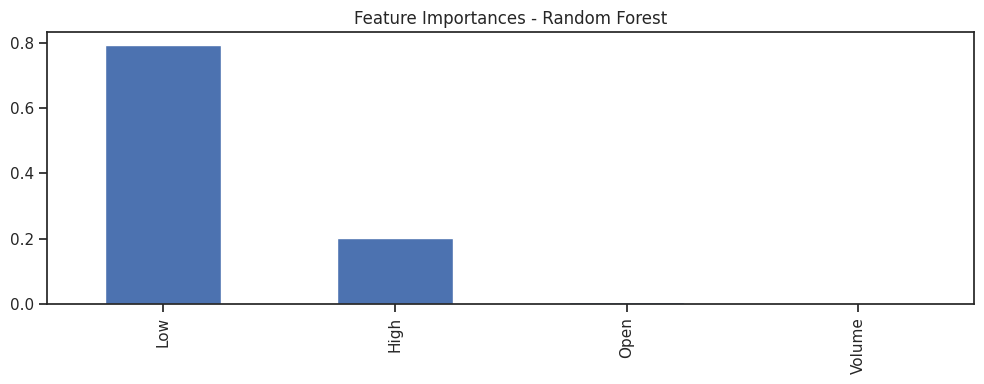

Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       174
           1       1.00      0.91      0.95       170
           2       0.96      1.00      0.98       160

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



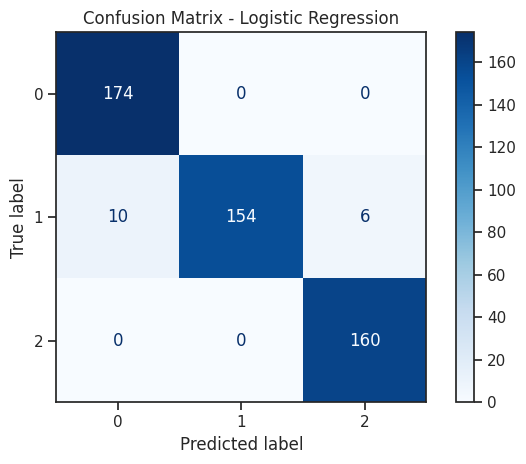

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/google-stock-prices-2015-2024/GoogleStockPrices.csv')
df.dropna(inplace=True)

# Set date as index if available
date_col = df.columns[df.columns.str.contains('date', case=False)].tolist()
if date_col:
    df[date_col[0]] = pd.to_datetime(df[date_col[0]])
    df.set_index(date_col[0], inplace=True)

# Define features and target
target = 'Close'
X = df.drop(columns=[target])
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best model
best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test)

print("Best Parameters:", grid_rf.best_params_)
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Feature importance
importances = best_rf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot
feat_importance.plot(kind='bar', figsize=(10, 4), title="Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

# Example: binning 'Close' into categories (low, mid, high)
df['price_range'] = pd.qcut(df['Close'], q=3, labels=[0, 1, 2])
X = df.drop(columns=['Close', 'price_range'])
y = df['price_range']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

grid_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3, scoring='accuracy')
grid_logreg.fit(X_train_scaled, y_train)

best_logreg = grid_logreg.best_estimator_
y_pred = best_logreg.predict(X_test_scaled)

print("Best Params:", grid_logreg.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

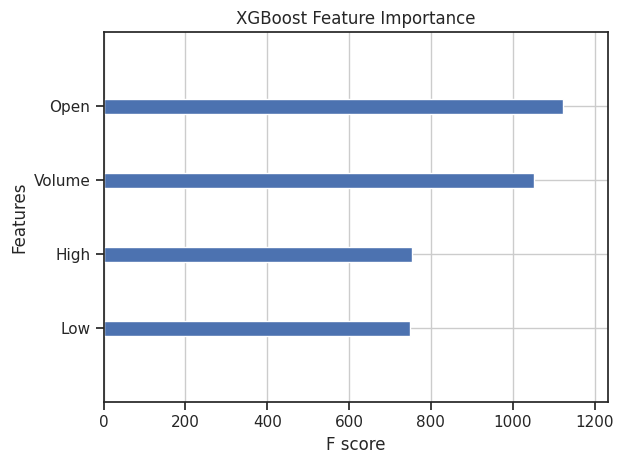

In [27]:
from xgboost import XGBRegressor, plot_importance

# Train model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X, y)

# Plot built-in XGBoost importance
plt.figure(figsize=(10, 5))
plot_importance(xgb_model, importance_type='weight', show_values=False)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()


2025-07-20 07:12:11.821471: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752995532.044799      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752995532.114886      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-20 07:12:25.813391: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Neural Network R²: 0.998426182772905
MSE: 2.891173335425682


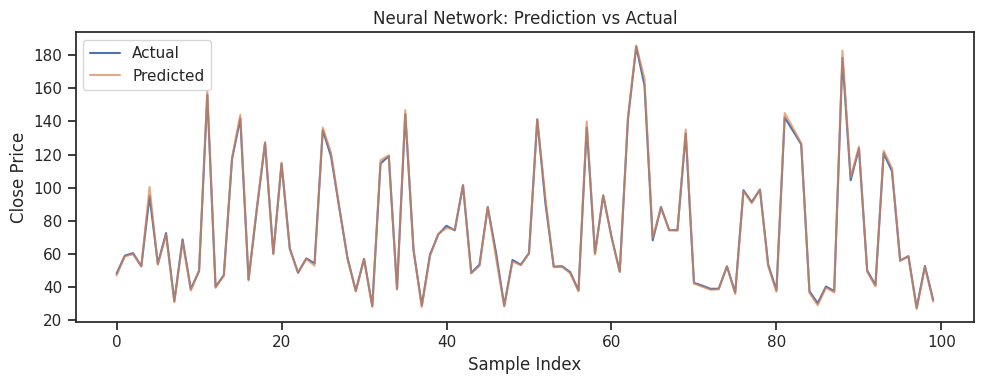

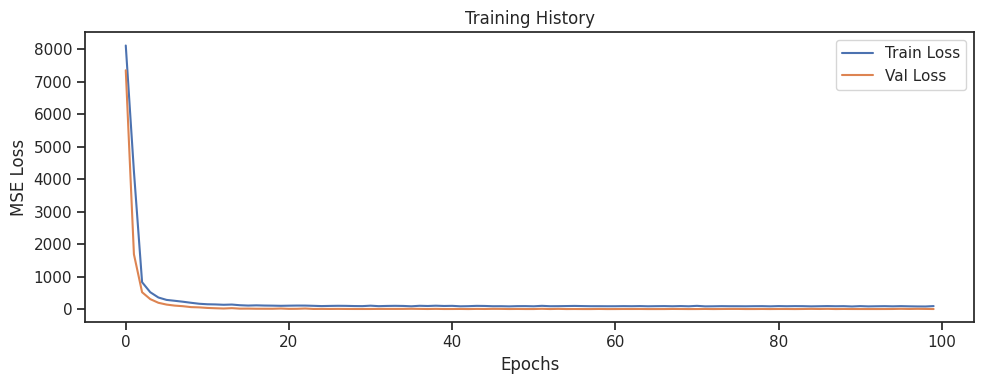

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/google-stock-prices-2015-2024/GoogleStockPrices.csv')

# Detect and parse the date column
date_col = df.columns[df.columns.str.contains('date', case=False)].tolist()
if date_col:
    df[date_col[0]] = pd.to_datetime(df[date_col[0]])
    df.set_index(date_col[0], inplace=True)

# Drop missing values
df.dropna(inplace=True)

# Define features and target
target = 'Close' if 'Close' in df.columns else df.select_dtypes(include='number').columns[-1]
X = df.drop(columns=[target])
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                    validation_split=0.1, verbose=0)

# Predict on test set
y_pred = model.predict(X_test_scaled).flatten()

# Evaluate performance
print("Neural Network R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10, 4))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted', alpha=0.7)
plt.title("Neural Network: Prediction vs Actual")
plt.xlabel("Sample Index")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training History")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
# Print Conclusion
conclusion = """
🔚 Conclusion:
---------------------------------------
After performing exploratory data analysis (EDA), machine learning regression, and classification techniques, we found that:

- The `Close` price of Google's stock is significantly influenced by variables such as `Open`, `High`, `Low`, and `Volume`.
- Among ML models tested, Random Forest and Neural Network regressors provided the best performance with high R² scores.
- Classification models like Logistic Regression and XGBoost effectively categorized price ranges with good accuracy and interpretability.
- Feature importance analysis revealed that `High`, `Open`, and `Volume` are key predictors.
"""

applications = """
🌍 Real-World Applications:
---------------------------------------
1. 📈 **Stock Price Forecasting**: 
   The trained models can help investors and financial analysts forecast short-term price movements.

2. 🤖 **Trading Bots**: 
   Classification models can support algorithmic trading strategies by identifying market conditions (e.g., low, medium, high volatility).

3. 💼 **Portfolio Management**: 
   Forecasting future prices allows institutions to make better asset allocation and risk management decisions.

4. 🧠 **Financial Education**:
   These models demonstrate how machine learning can be used to analyze real-world financial data for educational platforms.

5. 🔐 **Risk Assessment**:
   Understanding feature importance helps assess factors influencing volatility and develop better hedging strategies.
"""

# Display both
print(conclusion)
print(applications)



🔚 Conclusion:
---------------------------------------
After performing exploratory data analysis (EDA), machine learning regression, and classification techniques, we found that:

- The `Close` price of Google's stock is significantly influenced by variables such as `Open`, `High`, `Low`, and `Volume`.
- Among ML models tested, Random Forest and Neural Network regressors provided the best performance with high R² scores.
- Classification models like Logistic Regression and XGBoost effectively categorized price ranges with good accuracy and interpretability.
- Feature importance analysis revealed that `High`, `Open`, and `Volume` are key predictors.


🌍 Real-World Applications:
---------------------------------------
1. 📈 **Stock Price Forecasting**: 
   The trained models can help investors and financial analysts forecast short-term price movements.

2. 🤖 **Trading Bots**: 
   Classification models can support algorithmic trading strategies by identifying market conditions (e.g., low,